In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
acumulado = pd.read_csv("csv/dinero_acumulado.csv", sep=",")
gasto_ttl_mes = pd.read_csv("csv/gasto_mensual_total_usuario.csv", sep=",")
gasto_ttl_mes_fruta = pd.read_csv("csv/gasto_mensual_total_fruta_usuario.csv", sep=",")
cantidades_mes = pd.read_csv("csv/unidades frutas vendidas mes region - cantidad de frutas vendidas en cada mes separadas por region.csv", sep=",")

In [30]:
cantidades_mes[(cantidades_mes["fruta"] == "naranja") & (cantidades_mes["mes"] == 12)]

,region,fruta,mes,total
118,1,naranja,12,1191
119,2,naranja,12,13693


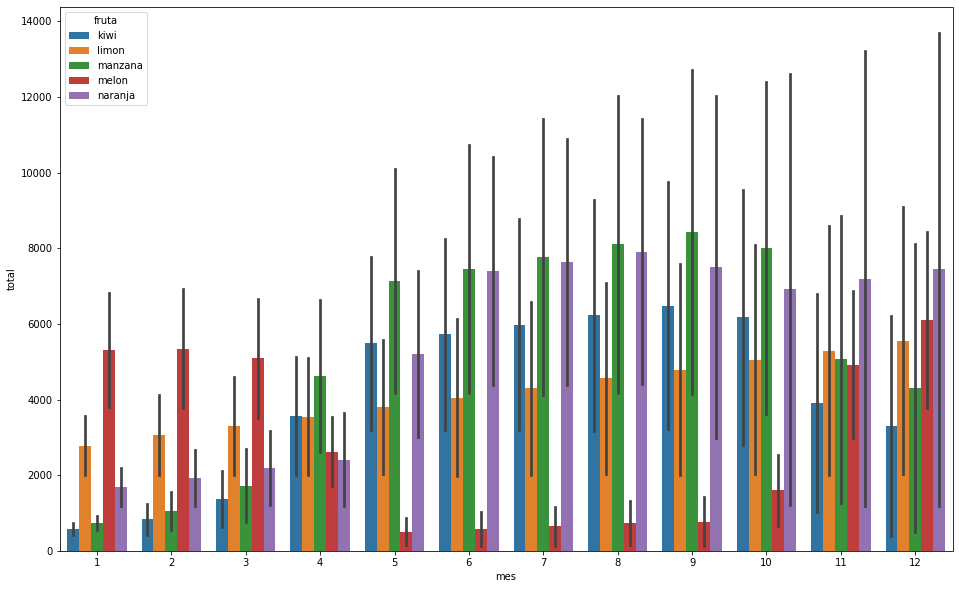

In [27]:

fig, ax = plt.subplots(figsize=(16, 10))

g = sns.barplot(
    data=cantidades_mes,
    x="mes", y="total", hue="fruta",
    ax = ax
)

plt.show()

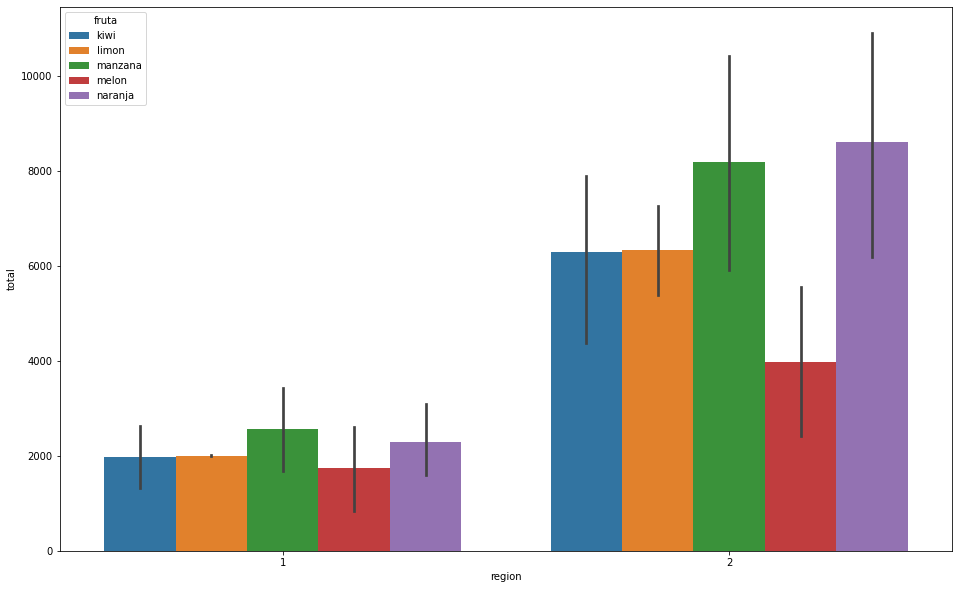

In [26]:

fig, ax = plt.subplots(figsize=(16, 10))

g = sns.barplot(
    data=cantidades_mes,
    x="region", y="total", hue="fruta",
    ax = ax
)

plt.show()

In [31]:
acumulado

,mes,entrante,ganancias_acumuladas
0,1,212115,212115
1,2,226470,438585
2,3,236457,675042
3,4,219275,894317
4,5,247175,1141492
5,6,292294,1433786
6,7,306340,1740126
7,8,321608,2061734
8,9,324218,2385952
9,10,334682,2720634


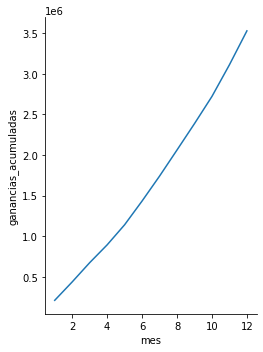

In [39]:
sns.relplot(
    data=acumulado,
    x="mes", y="ganancias_acumuladas", kind="line",
    height=5, aspect=.75, facet_kws=dict(sharex=False),
)

In [40]:
gasto_ttl_mes

,usuario_id,region,mes,entrante
0,1,1,1,413
1,1,1,3,223
2,1,1,4,206
3,1,1,5,179
4,1,1,6,114
...,...,...,...,...
4365,256,1,12,319
4366,257,1,12,374
4367,259,1,12,418
4368,260,1,12,361


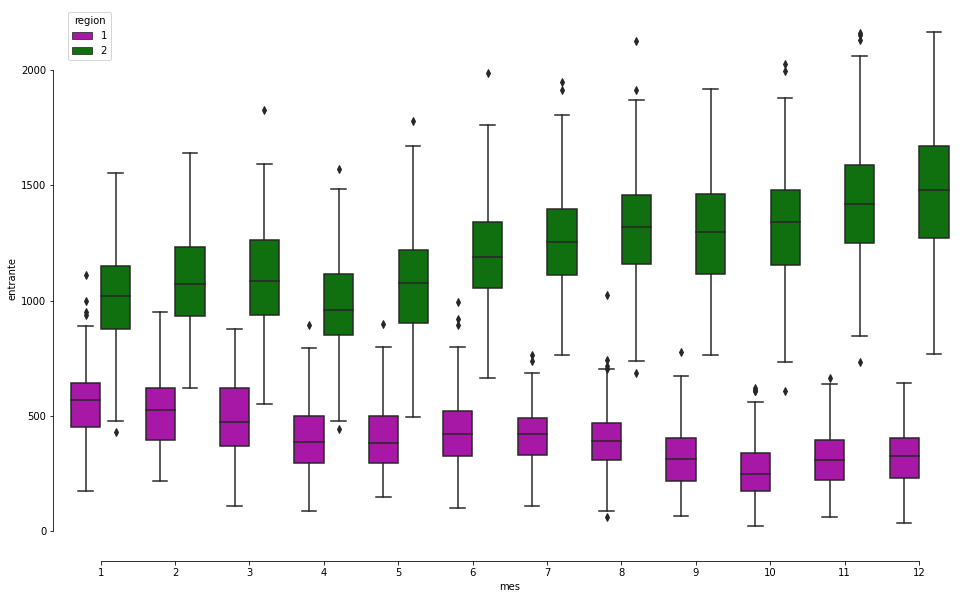

In [42]:

fig, ax = plt.subplots(figsize=(16, 10))


sns.boxplot(x="mes", y="entrante",
            hue="region", palette=["m", "g"],
            data=gasto_ttl_mes)
sns.despine(offset=10, trim=True)

plt.show()


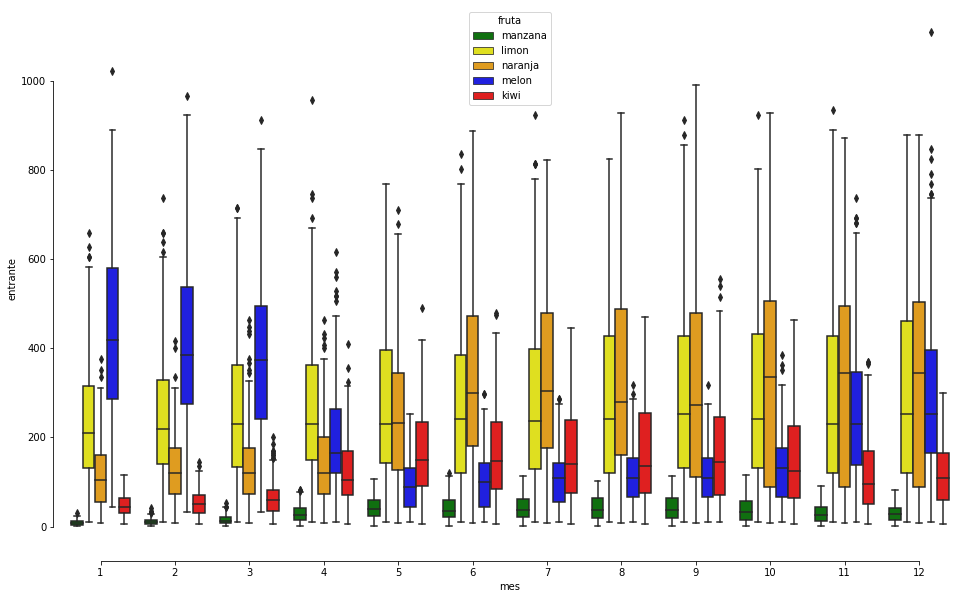

In [46]:

fig, ax = plt.subplots(figsize=(16, 10))


sns.boxplot(x="mes", y="entrante",
            hue="fruta", palette=["green", "yellow", "orange", "blue", "red"],
            data=gasto_ttl_mes_fruta)
sns.despine(offset=10, trim=True)

plt.show()